In [1]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for nicer graphics
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
from collections import Counter

In [16]:
df = pd.read_csv('data_cleaned.csv')
demo_factor = 2
df.head(1)

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you learn about products: Telegram Group Chats,Why use Surprize: It’s delivered straight to my doorstep!,Why use Surprize: It’s hassle free,Why use Surprize:,Why use Surprize: I like trying new products!,Why use Surprize: I like reviewing products and having my voice heard!,Why use Surprize: I like that it’s absolutely free!,Why use Surprize: It sounds fun!,Why use Surprize: Being able to try new products help me make better purchase decisions!,Why not use Surprize:,Why not use Surprize: This app sounds too good to be true,Why not use Surprize: Sounds like too much hassle,Why not use Surprize: I’m not inclined to use products I receive for free,Why not use Surprize: I don't trust that the application would do what it says,Why not use Surprize: I do not like to try products I am not familiar with,What kinds of prizes: Food 

In [17]:
non_impt_columns = [
    'How long are you willing to wait for the Prize to be delivered to your home?',
    'Suppose you could receive your Prize earlier (within 1 - 3 days), what is the maximum amount you would be willing to pay to receive it earlier?',
    'In this app, you are required to answer a few questions to help companies gain insights on the prizes that you have received. What is the maximum amount of time you would be willing to spend on the questions?',
    'I recommend products to my friends.'
]
identity_columns = [
    'Name',
    'Gender',
    'Email address (to receive exciting updates) - Please follow our Instagram for updates and other exciting news :)',
    'Any questions or suggestions for us? (Give us your wildest ideas / comments)'
]
demographic_columns = [
    'How young are you?',
    'What is your marital status?',
    'What level of education have you obtained?',
    'What is your current employment status?',
    'What is your annual income?'
]

In [18]:
demo_actual_cols = [new_col for new_col in df.columns if any(og_col in new_col for og_col in demographic_columns)]

In [19]:
df[demo_actual_cols] = df[demo_actual_cols]*demo_factor

In [20]:
demo_to_options = {}
for demo_attr in demographic_columns:
    options = [i for i in demo_actual_cols if demo_attr in i]
    demo_to_options[demo_attr] = options

# 2

In [21]:
km2 = KMeans(2)
km2.fit(df)
np.bincount(km2.labels_)

array([326, 199])

In [22]:
df2 = pd.DataFrame(km2.cluster_centers_,columns = df.columns)
# df2 = df2.append(df.mean(),ignore_index=True)
df2[demo_actual_cols] = df2[demo_actual_cols]/demo_factor
df2 = df2.clip(lower=0)
df2

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you learn about products: Telegram Group Chats,Why use Surprize: It’s delivered straight to my doorstep!,Why use Surprize: It’s hassle free,Why use Surprize:,Why use Surprize: I like trying new products!,Why use Surprize: I like reviewing products and having my voice heard!,Why use Surprize: I like that it’s absolutely free!,Why use Surprize: It sounds fun!,Why use Surprize: Being able to try new products help me make better purchase decisions!,Why not use Surprize:,Why not use Surprize: This app sounds too good to be true,Why not use Surprize: Sounds like too much hassle,Why not use Surprize: I’m not inclined to use products I receive for free,Why not use Surprize: I don't trust that the application would do what it says,Why not use Surprize: I do not like to try products I am not familiar with,What kinds of prizes: Food 

In [23]:
len(df2)

2

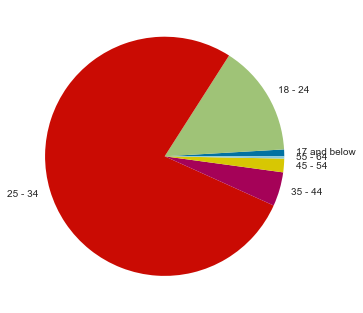

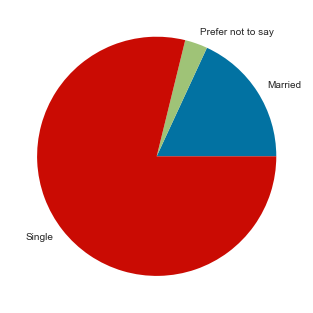

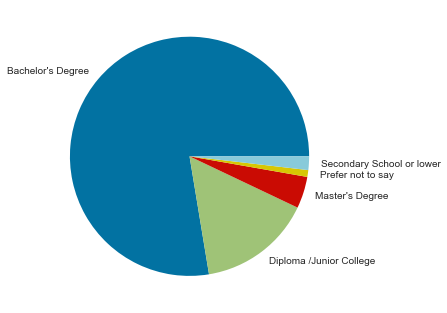

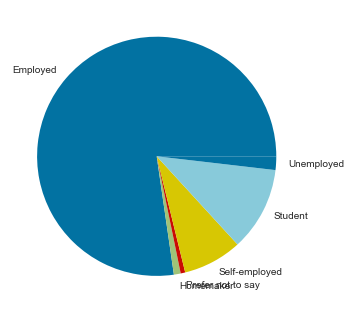

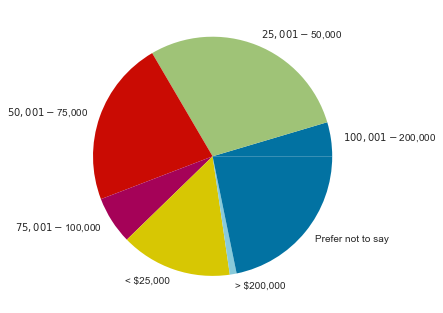

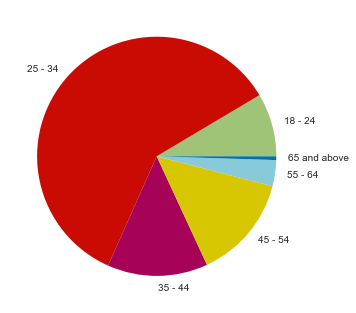

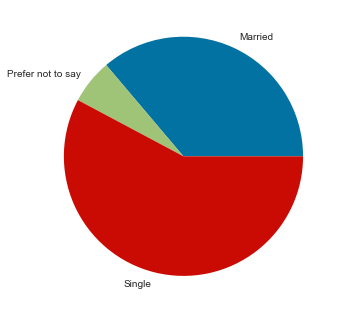

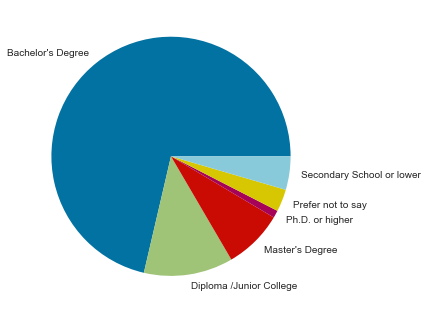

/Users/hellozhems/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


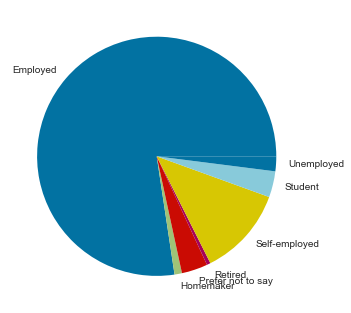

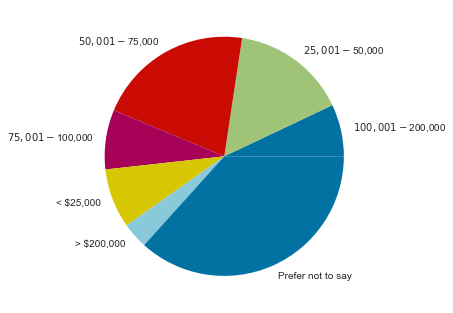

In [24]:
for row in range(len(df2)):
    for demo_attr in demographic_columns:
        options = demo_to_options[demo_attr]
        options_short = [i.split('_')[-1] for i in options]
        temp = df2.copy()
        temp = temp[options].rename(columns={i:i.split('_')[-1] for i in options})
        temp.loc[row,options_short].plot.pie(ylabel='')
        plt.show()

# 3
Most useful demographic split that gives strongest cluster behaviour:
 - Single and pre-uni (24-)
 - Single and uni educated (25+)
 - Married

In [25]:
km3 = KMeans(3)
km3.fit(df)
np.bincount(km3.labels_)

array([ 67, 276, 182])

In [26]:
df3 = pd.DataFrame(km3.cluster_centers_,columns = df.columns)
# df2 = df2.append(df.mean(),ignore_index=True)
df3[demo_actual_cols] = df3[demo_actual_cols]/demo_factor
df3 = df3.clip(lower=0)
df3

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?,Samples from where: Supermarkets / Supermarket Promoters,Samples from where: Retail Stores / Promoters,Samples from where: Roadshows,Samples from where: Websites,Samples from where: Social Media Giveaways,Samples from where: Mobile Apps,Samples from where: Vending Machines,What kind of samples collected: Food / Beverage,What kind of samples collected: Beauty / Cosmetics,What kind of samples collected: Skin Care,What kind of samples collected: F&B Vouchers,What kind of samples collected: Sports and Fitness,What kind of samples collected: Electronics,What kind of samples collected: Personal Care / Toiletries,What kind of samples collected: Hair Care,What kind of samples collected: Education,"What kind of samples collected: Services Vouchers (massage, spa, fitness class, etc)",What kind of samples collected: Home and Living,What kind of samples collected: Toys / Gaming,What kind of samples collected: Clothing / Wearables,What kind of samples collected: Kitchen / Cookware,What kind of samples collected: Baby Products,Why reject sample: The samples / products are not attractive,Why reject sample: I’ll feel pressured to buy the product,Why reject sample: Sample is from a brand I don't really know / not willing to try the product,Why reject sample: I'm certain I won't use the product,Why reject sample: It takes too much of my time and effort / too troublesome,Why reject sample: I am too shy to take the sample,Why reject sample: I’m afraid people around might judge me,How you learn about products: Receiving samples,How you learn about products: Friends and Family,How you learn about products: Google Search,How you learn about products: Instagram,How you learn about products: Facebook,How you learn about products: Tik Tok,How you learn about products: Youtube,How you learn about products: Marketing Emails,How you learn about products: Direct Mail,How you learn about products: Roadshows,How you learn about products: Television Advertisements,How you learn about products: Radio Advertisements,"How you learn about products: Print Media (Brochures, Poster, Flyers, etc)",How you learn about products: Newspapers and News Articles,How you learn about products: Telegram Group Chats,Why use Surprize: It’s delivered straight to my doorstep!,Why use Surprize: It’s hassle free,Why use Surprize:,Why use Surprize: I like trying new products!,Why use Surprize: I like reviewing products and having my voice heard!,Why use Surprize: I like that it’s absolutely free!,Why use Surprize: It sounds fun!,Why use Surprize: Being able to try new products help me make better purchase decisions!,Why not use Surprize:,Why not use Surprize: This app sounds too good to be true,Why not use Surprize: Sounds like too much hassle,Why not use Surprize: I’m not inclined to use products I receive for free,Why not use Surprize: I don't trust that the application would do what it says,Why not use Surprize: I do not like to try products I am not familiar with,What kinds of prizes: Food 

Cluster 0


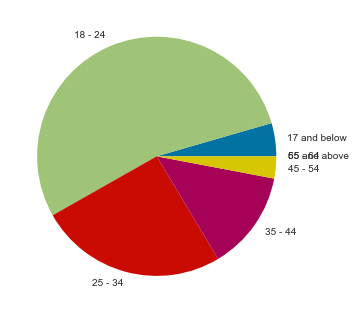

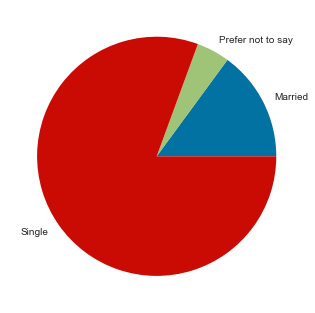

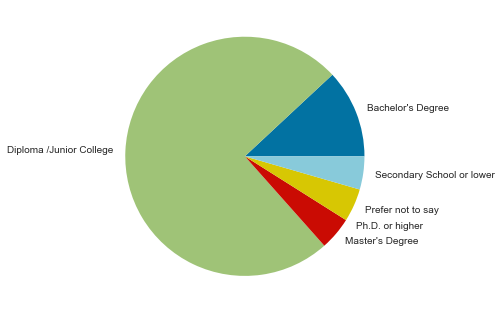

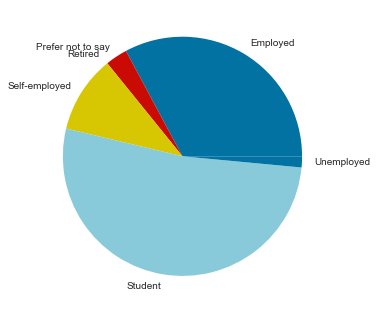

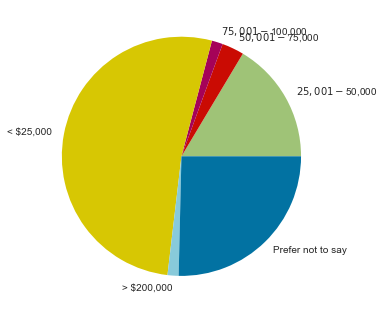

Cluster 1


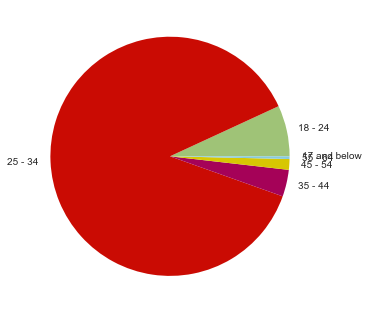

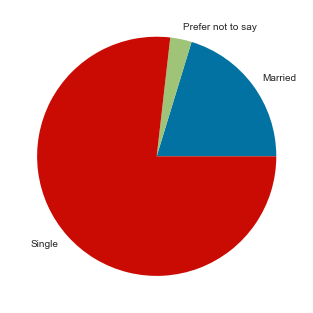

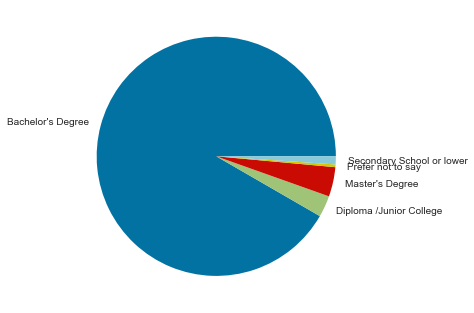

/Users/hellozhems/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


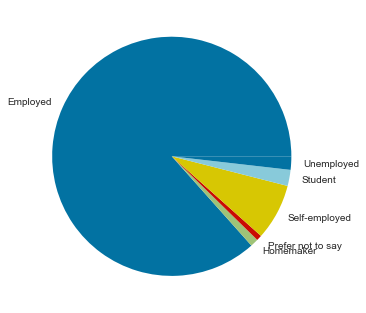

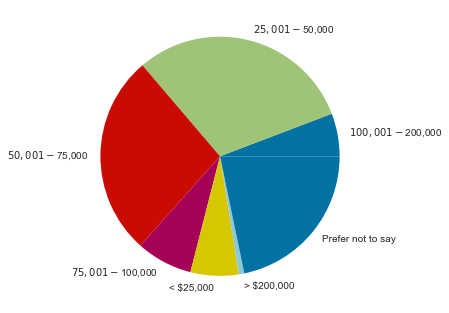

Cluster 2


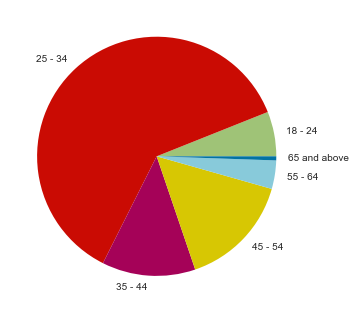

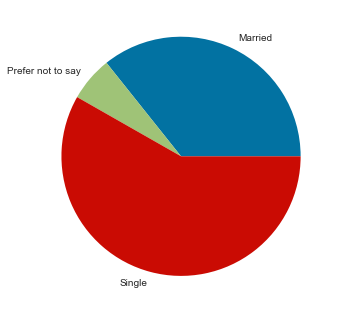

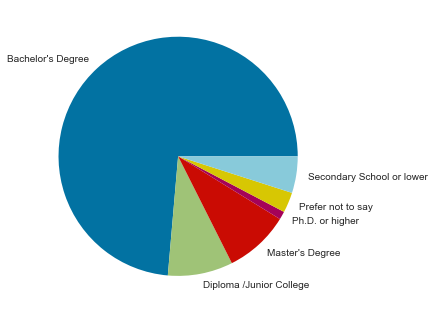

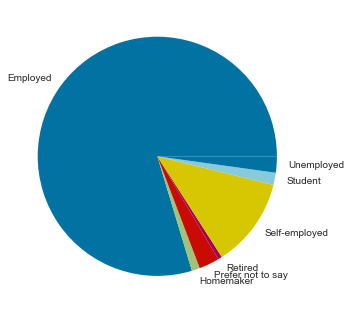

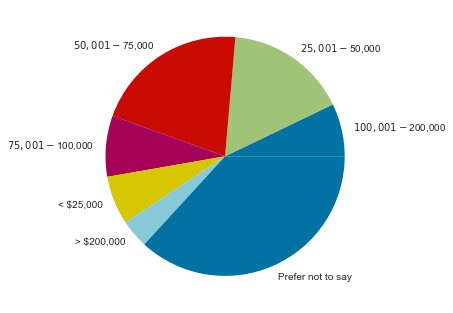

In [27]:
for row in range(len(df3)):
    print(f'Cluster {row}')
    for demo_attr in demographic_columns:
        options = demo_to_options[demo_attr]
        options_short = [i.split('_')[-1] for i in options]
        temp = df3.copy()
        temp = temp[options].rename(columns={i:i.split('_')[-1] for i in options})
        temp.loc[row,options_short].plot.pie(ylabel='')
        plt.show()

In [28]:
multichoice_short = ['Samples from where: ',
                    'What kind of samples collected: ',
                    'Why reject sample: ',
                    'How you learn about products: ',
                    'Why use Surprize: ',
                    'Why not use Surprize: ',
                    'What kinds of prizes: ']
multichoice_actual_cols = [new_col for new_col in df.columns if any(og_col in new_col for og_col in multichoice_short)]
multichoice_to_options = {}
for multichoice_attr in multichoice_short:
    options = [i for i in multichoice_actual_cols if multichoice_attr in i]
    multichoice_to_options[multichoice_attr] = options

Samples from where: 


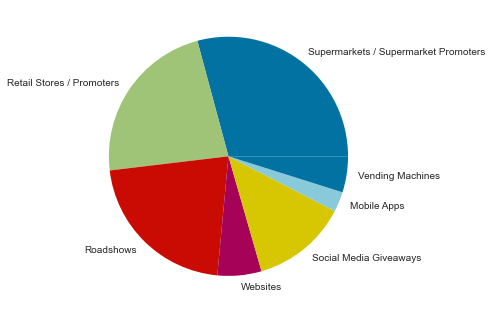

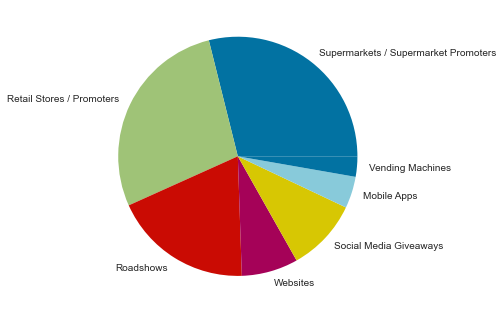

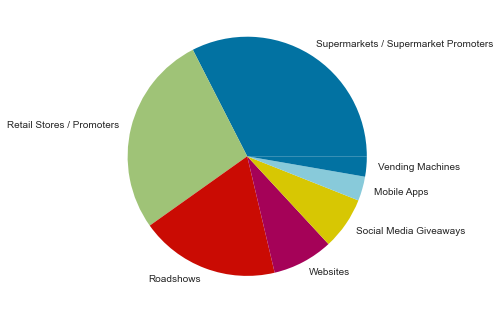

What kind of samples collected: 


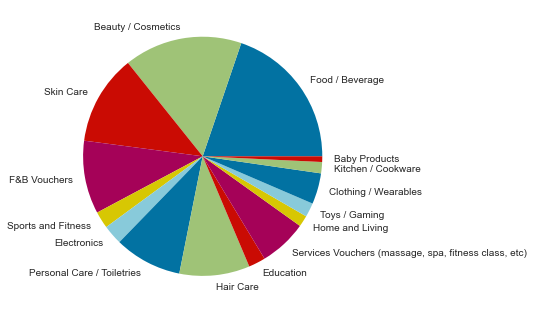

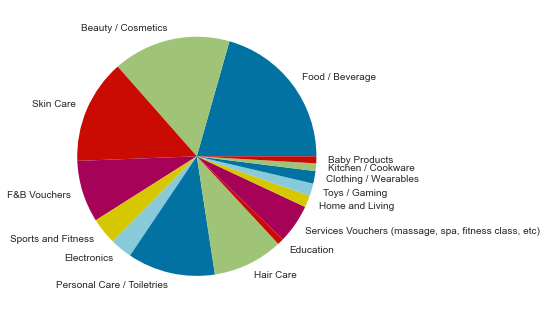

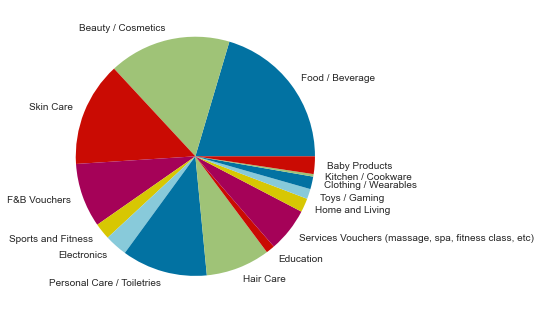

Why reject sample: 


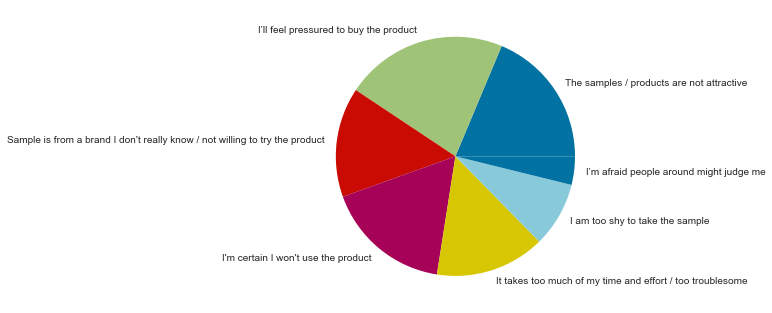

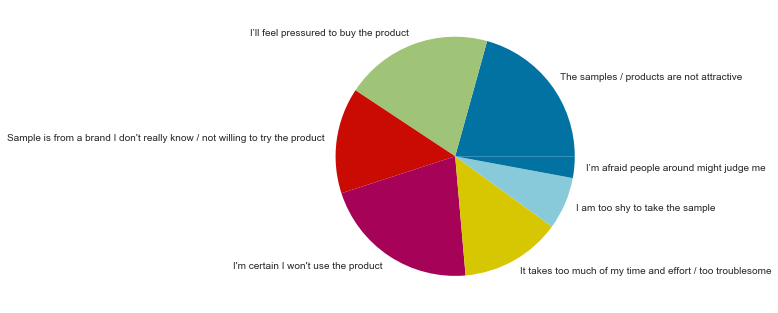

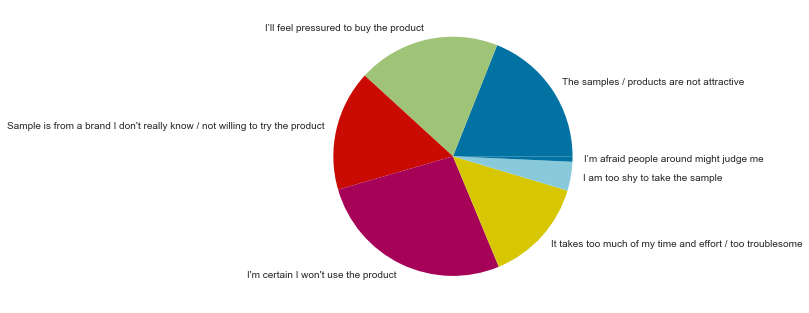

How you learn about products: 


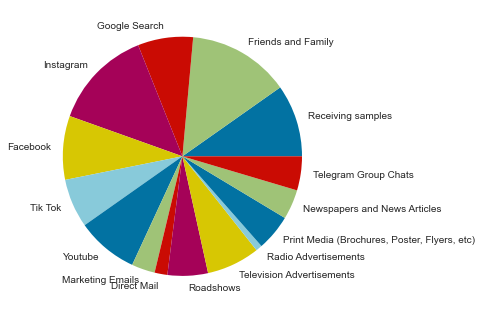

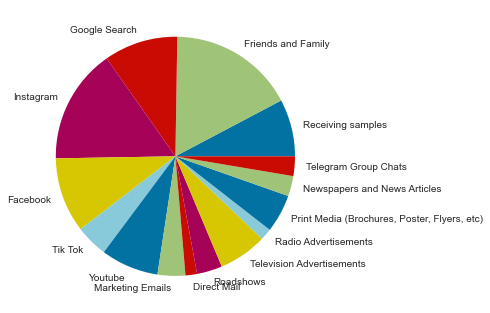

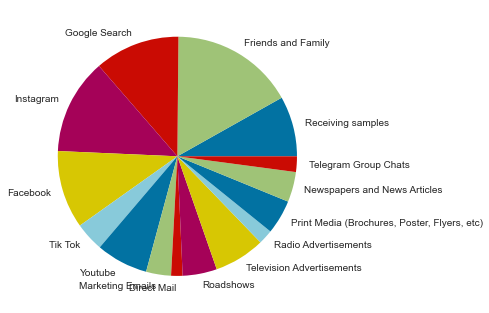

Why use Surprize: 


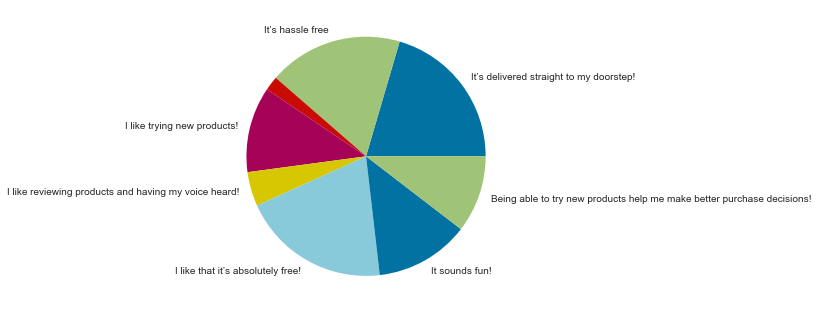

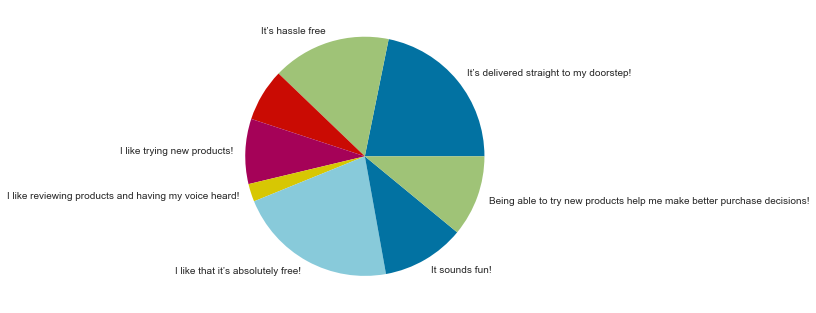

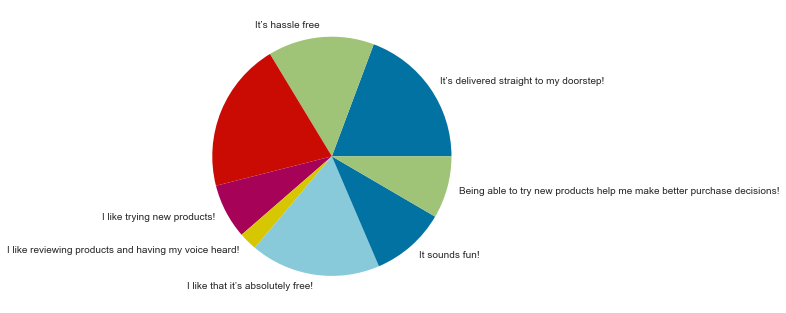

Why not use Surprize: 


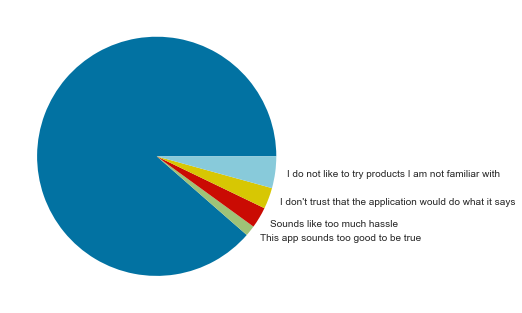

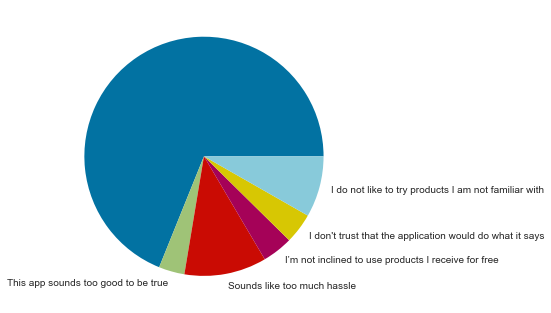

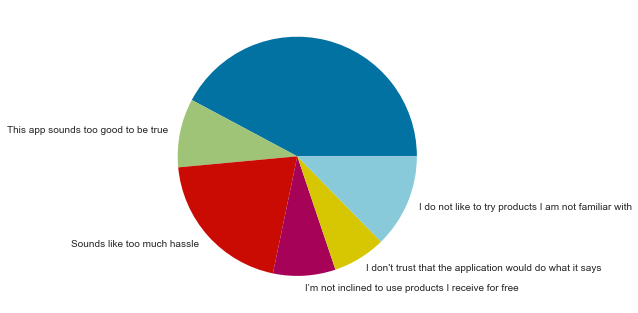

What kinds of prizes: 


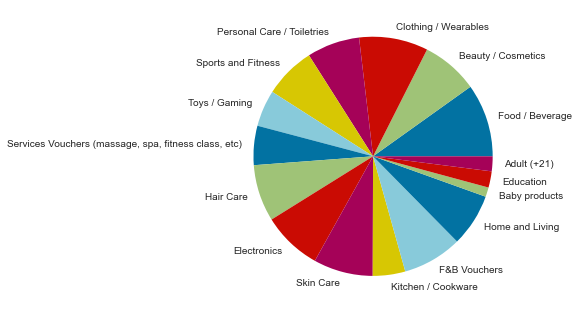

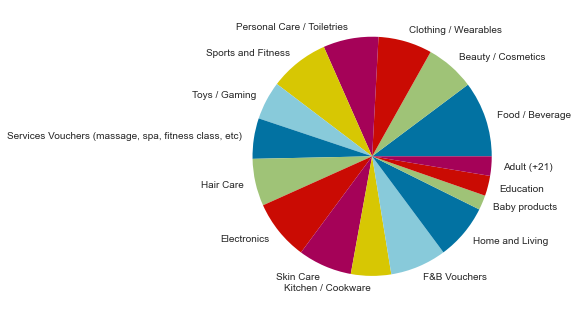

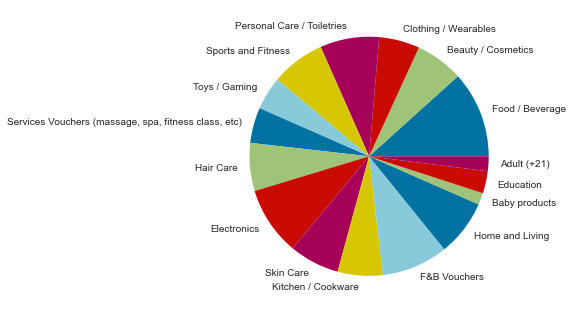

In [29]:
for multi in multichoice_short:
    print(multi)
    for i in range(3):
        temp = df[np.where(km3.labels_==i,True,False)].copy()
        temp = temp[multichoice_to_options[multi]].rename(columns={i:i.split(': ')[-1] for i in multichoice_to_options[multi]})
        temp = temp.sum()
#         temp = df[np.where(km3.labels_==i,True,False)].sum()[multichoice_to_options[multi]]
        temp.plot.pie(ylabel='')
        plt.show()

In [34]:
numeric_cols = [i for i in df.columns if ':' not in i and '_' not in i]
numeric_cols

['How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?',
 "I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand]",
 "I'll be more convinced to purchase a new product because [I tried a sample of the product]",
 "I'll be more convinced to purchase a new product because [It was recommended by my friends / family members]",
 "I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it]",
 "I'll be more convinced to purchase a new product because [The product had a lot of positive reviews]",
 "I'll be more convinced to purchase a new product because [The advertisement for the product was good]",
 "I'll be more convinced to purchase a new product because [There was a price promotion]",
 'To what extent does receiving and using samples influence your purchase decisions?',
 'Will you use this app, based on the description above?',
 'Will yo

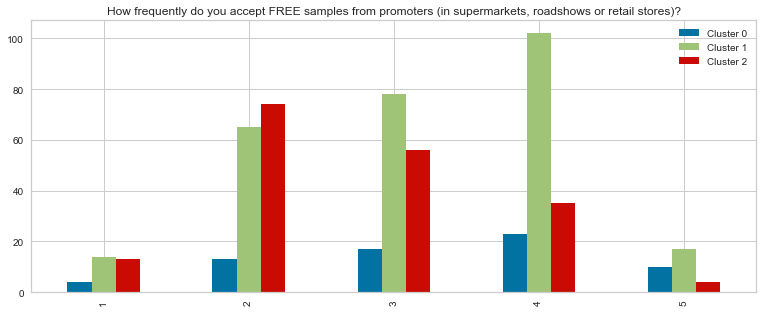

In [70]:
col='How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?'
plot_df = pd.DataFrame()
for i in range(3):
    temp = df[np.where(km3.labels_==i,True,False)].copy()
    temp = pd.Series(temp[col].value_counts(),name=f'Cluster {i}')
    plot_df = pd.concat([plot_df, temp], axis=1)
plot_df.plot(kind='bar',figsize=(13,5),title=col)
plt.show()

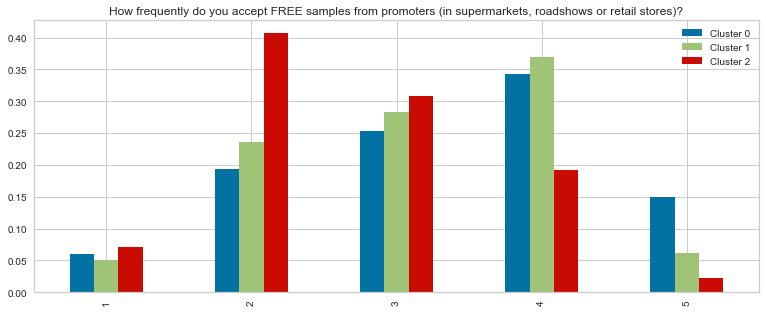

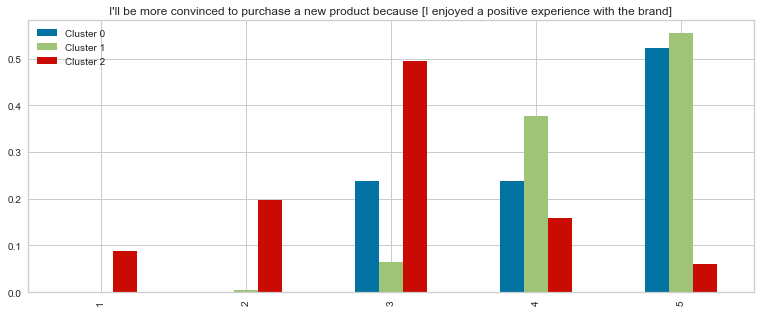

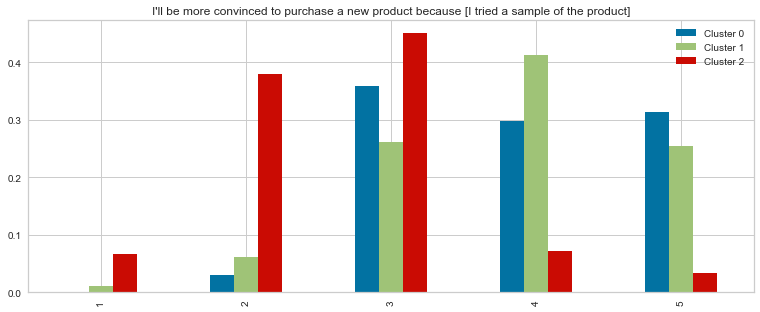

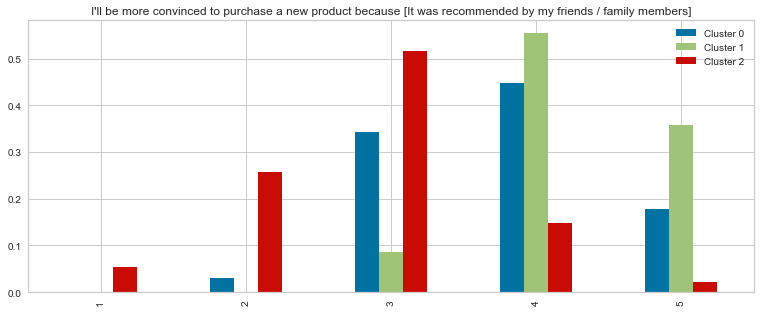

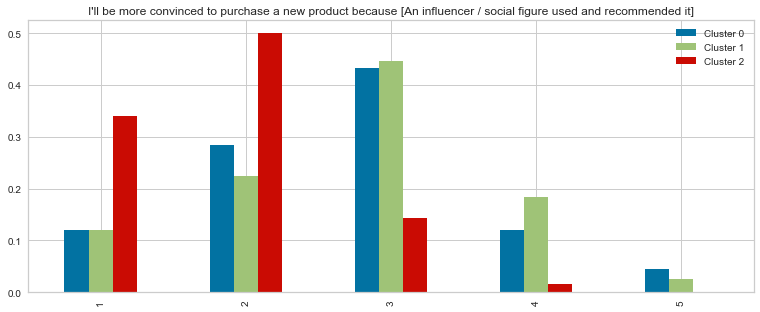

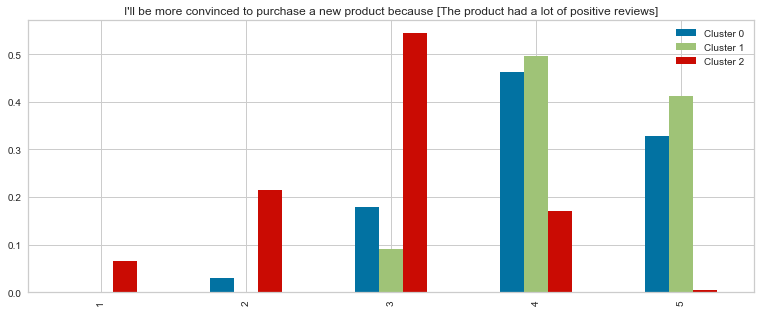

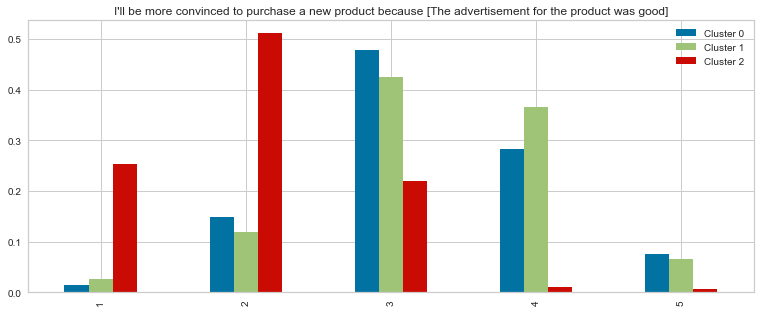

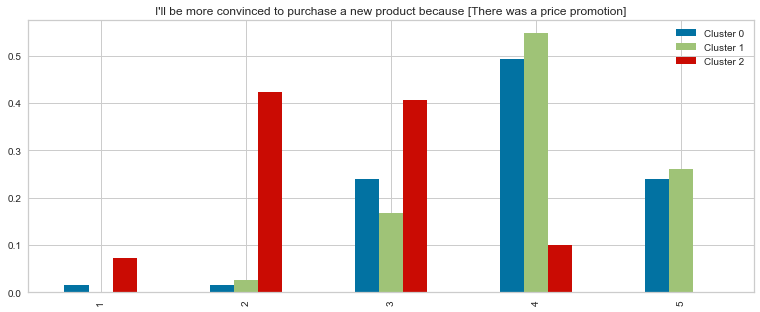

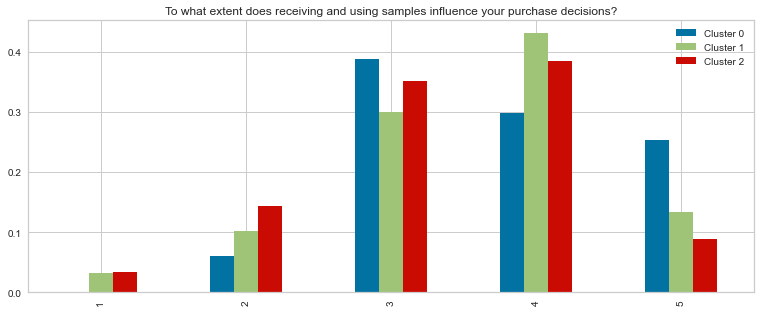

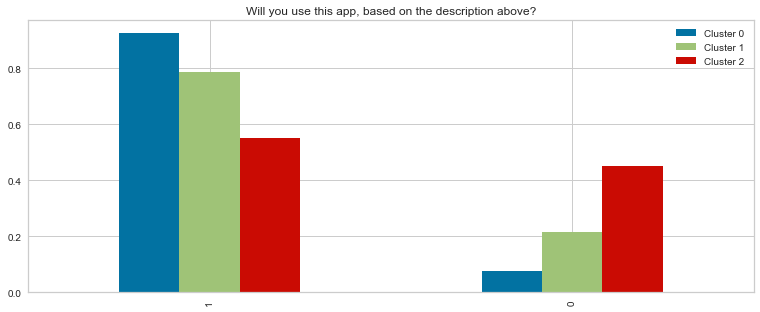

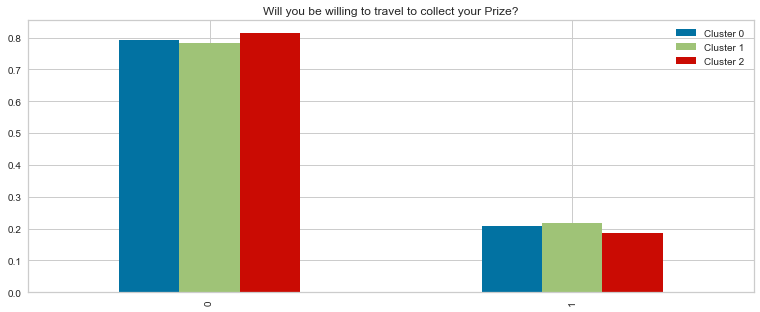

In [75]:
for col in numeric_cols:
    plot_df = pd.DataFrame()
    for i in range(3):
        temp = df[np.where(km3.labels_==i,True,False)].copy()
        temp = pd.Series(temp[col].value_counts(),name=f'Cluster {i}')
        plot_df = pd.concat([plot_df, temp], axis=1)
    plot_df = plot_df/plot_df.sum()
    plot_df.plot(kind='bar',figsize=(13,5),title=col)
    plt.show()

In [48]:
df[numeric_cols]

,"How frequently do you accept FREE samples from promoters (in supermarkets, roadshows or retail stores)?",I'll be more convinced to purchase a new product because [I enjoyed a positive experience with the brand],I'll be more convinced to purchase a new product because [I tried a sample of the product],I'll be more convinced to purchase a new product because [It was recommended by my friends / family members],I'll be more convinced to purchase a new product because [An influencer / social figure used and recommended it],I'll be more convinced to purchase a new product because [The product had a lot of positive reviews],I'll be more convinced to purchase a new product because [The advertisement for the product was good],I'll be more convinced to purchase a new product because [There was a price promotion],To what extent does receiving and using samples influence your purchase decisions?,"Will you use this app, based on the description above?",Will you be willing to travel to collect your Prize?
0,3,4,4,4,2,5,3,4,3,1,0
1,3,2,2,3,2,3,2,2,4,0,0
2,4,5,4,3,2,5,3,5,4,1,0
3,2,5,3,4,2,4,3,5,2,1,1
4,3,3,4,5,4,4,2,4,3,0,0
5,1,5,1,5,1,5,3,5,1,1,0
6,3,5,3,4,3,4,3,4,4,1,0
7,3,3,3,3,3,3,3,3,4,0,0
8,4,5,5,5,3,5,5,5,4,1,0
9,4,5,3,5,4,5,4,4,3,1,0
